<h3> The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

|Attribute|Description|
|:--|:--|
|Time	  |Time of the readings, with a time span of 1 min. |
|Use [kW] |Total energy consumption |
|Gen [kW] |Total energy generated by means of solar |
|House overall [kW]|Overall house energy consumption|
|Fridge [kW]|Energy consumed by specific appliance|
|Wine cellar [kW]|
|Garage door [kW]|
|Dishwasher [kW]|
|Furnace 1 [kW]|
|Furnace 2 [kW]|
|Home office [kW]|
|Barn [kW]|
|Well [kW]|
|Living room [kW]|
|Kitchen 12 [kW]|
|Kitchen 14 [kW]|
|Kitchen 38 [kW]|
|Microwave [kW]|
|Solar [kW]|Solar power generation|
|Temperature [(°C)]|Temperature is a physical quantity expressing hot and cold.|
|Icon|The icon that is used by the data collection system|
|Humidity|Humidity is the concentration of water vapour present in air.|
|Visibility [metres]|Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.|
|Summary|Report generated by data collection system|
|ApparentTemperature|Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.|
|pressure |Air pressure. Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather|
|WindSpeed [km/h]|Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.|
|CloudCover [Okta]|Cloud cover refers to the fraction of the sky obscured by clouds.|
|windBearing|In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings".|
|dewPoint|The atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.|
|PrecipProbability|A probability of precipitation|
|PrecipIntensity [mm/h]|The intensity of rainfall is a measure of the amount of rain that falls over time.|

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> 1. Understanding the data

In [3]:
#reading the dataset
df=pd.read_csv('HomeC.csv', low_memory=False)

In [4]:
df.shape

(503911, 32)

In [5]:
df.head(3)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [8]:
#function to understand dataset 

def understand_data(data) :
    
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.nunique(axis=0,dropna=True),
                         "Levels": data.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
time,object,0,503911,['1451624400' '1451624401' '1451624402' ... '1...
use [kW],float64,1,130103,[0.93283333 0.93433333 0.93181667 ... 1.551816...
gen [kW],float64,1,29904,[0.00348333 0.00346667 0.00343333 ... 0.1532 ...
House overall [kW],float64,1,130103,[0.93283333 0.93433333 0.93181667 ... 1.551816...
Dishwasher [kW],float64,1,9595,[3.33000000e-05 0.00000000e+00 1.67000000e-05 ...
Furnace 1 [kW],float64,1,28755,[0.0207 0.02071667 0.1069 ... 0.189716...
Furnace 2 [kW],float64,1,28700,[0.06191667 0.06381667 0.06231667 ... 0.5292 ...
Home office [kW],float64,1,23272,[0.44263333 0.44406667 0.44606667 ... 0.233166...
Fridge [kW],float64,1,13986,[0.12415 0.124 0.12353333 ... 0.060083...
Wine cellar [kW],float64,1,10738,[0.00698333 0.00685 0.00671667 ... 0.05885 ...


- continuous data except for three attributes,  - icon, summary and cloudcover which are categorical
- time has discrete data
- Cloud seems to be wrongly read as object. Missing values are entered as 'cloudCover'.
- One row of missing value in the entire dataset.
- The column 'time' is in unix timestamp. Convert the timestamp to date and time.

<h1>2. Preprocessing

In [9]:
#Removing [kW] from column names
df.columns = [feature.replace(' [kW]', '') for feature in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [10]:
#Furnace1 and Furnace2 columns can be combined
df['Furnace']=df[['Furnace 1','Furnace 2']].sum(axis=1)

In [11]:
#Kitchen 12, Kitchen 14, and Kitchen 38 can be combined
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [12]:
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'],axis=1,inplace=True)

In [13]:
#Removing the duplicate columns found during EDA
df.drop(['Solar','House overall'],axis=1,inplace=True)

In [14]:
df.rename(columns={'use':'Used','gen':'Generated'}, inplace=True)

In [16]:
df.columns

Index(['time', 'Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

<h2> Removing Null Values

In [17]:
df[df.isnull().any(axis=1)]

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [18]:
#Last row contains NaN, so we remove it from data.
df=df.dropna()

In [19]:
df.isna().sum()

time                   0
Used                   0
Generated              0
Dishwasher             0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Barn                   0
Well                   0
Microwave              0
Living room            0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
Furnace                0
Kitchen                0
dtype: int64

<h2> Invalid rows

In [20]:
# During EDA we found that attribute 'cloudCover' was wrongly read as object. Missing values are entered as 'cloudCover'.
#Perfoming necessary steps to handle missing values in this column. 
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [21]:
df[df['cloudCover']=='cloudCover'].shape


(58, 27)

In [22]:
#we have to replace this missing values entered as cloudcover with next valid observation 

In [23]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

<h2> Datetime Information 

In [24]:
import time
#Finding the start time
start_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))

In [25]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min

df['time'] = pd.date_range(start_time, periods=len(df),  freq='min') 

In [26]:
df.head(3)

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
0,2016-01-01 10:30:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
1,2016-01-01 10:31:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2,2016-01-01 10:32:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


<h2> Feature Engineering 

In [27]:
#Extracting new features from 'time' column
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head(3)

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,precipProbability,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute
0,2016-01-01 10:30:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,0.0,0.082617,0.000567,2016,1,1,Friday,53,10,30
1,2016-01-01 10:31:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,0.0,0.084533,0.000567,2016,1,1,Friday,53,10,31
2,2016-01-01 10:32:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,0.0,0.083017,0.000617,2016,1,1,Friday,53,10,32


In [28]:
#Hour variable can be labelled as Night, Morning, Afternoon and Evening based on its number.
#Night : 22:00 - 23:59 / 00:00 - 03:59
#Morning : 04:00 - 11:59
#Afternoon : 12:00 - 16:59
#Evening : 17:00 - 21:59
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [29]:
df['timing'] = df['hour'].apply(hours2timing)

In [30]:
df.head(3)

,time,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute,timing
0,2016-01-01 10:30:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,0.082617,0.000567,2016,1,1,Friday,53,10,30,Morning
1,2016-01-01 10:31:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,0.084533,0.000567,2016,1,1,Friday,53,10,31,Morning
2,2016-01-01 10:32:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,0.083017,0.000617,2016,1,1,Friday,53,10,32,Morning


In [31]:
year = df.pop('year')
df.insert(1, 'year', year)
month = df.pop('month')
df.insert(2, 'month', month)
day = df.pop('day')
df.insert(3, 'day', day)
weekday = df.pop('weekday')
df.insert(4, 'weekday', weekday)
weekofyear = df.pop('weekofyear')
df.insert(5, 'weekofyear', weekofyear)
hour = df.pop('hour')
df.insert(6, 'hour', hour)
minute = df.pop('minute')
df.insert(7, 'minute', minute)
timing=df.pop('timing')
df.insert(8,'timing',timing)

In [32]:
df = df.set_index('time')

In [33]:

df.head(3)

,year,month,day,weekday,weekofyear,hour,minute,timing,Used,Generated,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 10:30:00,2016,1,1,Friday,53,10,30,Morning,0.932833,0.003483,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
2016-01-01 10:31:00,2016,1,1,Friday,53,10,31,Morning,0.934333,0.003467,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2016-01-01 10:32:00,2016,1,1,Friday,53,10,32,Morning,0.931817,0.003467,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


<h2> Removing unwanted columns

In [34]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [35]:
df['icon'].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog'], dtype=object)

- Since the columns icon and summary are almost same and summary contains more data points we are dropping icon

In [36]:
df=df.drop(['icon'], axis=1)

In [37]:
df.columns

Index(['year', 'month', 'day', 'weekday', 'weekofyear', 'hour', 'minute',
       'timing', 'Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [38]:
#Seperating Energy and Weather data for convinience

In [39]:

energy_data = df.filter(items=['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room','Furnace', 'Kitchen' ])
weather_data = df.filter(items=['temperature', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])

In [40]:
energy_data.head(3)

,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen
time,,,,,,,,,,,,,
2016-01-01 10:30:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567
2016-01-01 10:31:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567
2016-01-01 10:32:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617


# Encoding

# Label Encoding

In [41]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
df['summary']=lr.fit_transform(df['summary'])
df.head(3)

,year,month,day,weekday,weekofyear,hour,minute,timing,Used,Generated,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 10:30:00,2016,1,1,Friday,53,10,30,Morning,0.932833,0.003483,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
2016-01-01 10:31:00,2016,1,1,Friday,53,10,31,Morning,0.934333,0.003467,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2016-01-01 10:32:00,2016,1,1,Friday,53,10,32,Morning,0.931817,0.003467,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


In [43]:
df['summary'].unique()

array([ 3, 12, 13, 14,  4, 10, 15, 11,  6,  0, 17, 16,  8,  1,  2,  7,  5,
        9])

<h2> Resampling 

In [43]:
#hourly resampling
dataH=df.resample('H').mean()
#daily resampling 
dataD=df.resample('D').mean()

<h1> Decomposing time series 

Decomposing time series into components level, trend, season and residual/noise.<br>
- <b>Level</b> is the main value that goes on average with time.
- <b>Trend</b> is another component of time series which means any pattern in data that shows movement in time series data that may be increasing or decreasing.
- <b>Seasonality</b> is an essential component of time series which indicates a regular and predictable increase and decrease in amount according to calendar year.
- <b>Residual/noise</b> are the random variations in the time series. Everything not captured by trend and seasonal components
<br>
Most time series consists of the level and noise/residual and the trend or seasonality are the optional values. They may take part or they may not. 

Understanding the time-series would let us know whether the series is having linear or exponential trend, additive or multiplicative seasonality which aides us in using appropriate techniques for considering these effects.

<h3> Finding the trend

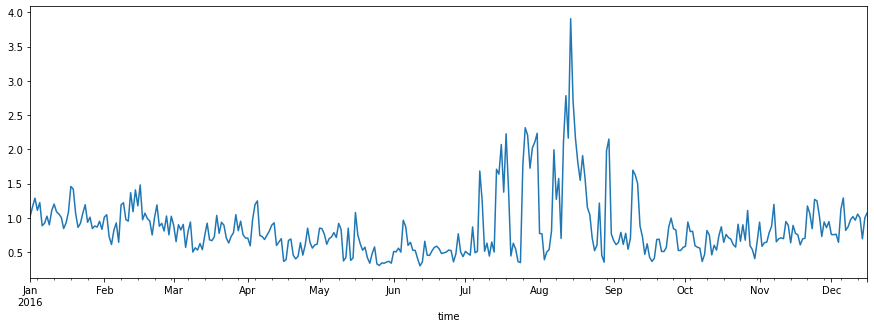

In [44]:
plt.rcParams["figure.figsize"] = (15,5)
dataD['Used'].plot()
plt.show()

- Here its showing non linear trend

<h3> Finding the seasonality

    Seasonality is a common characteristic of time series. 
    It can appear in two forms: 
    (i)additive
    (ii)multiplicative
    In the additive Seasonality the amplitude of the seasonal variation is independent of the level, 
    In the Multiplicative Seasonality the amplitude and  the level are connected. 

<AxesSubplot:xlabel='time'>

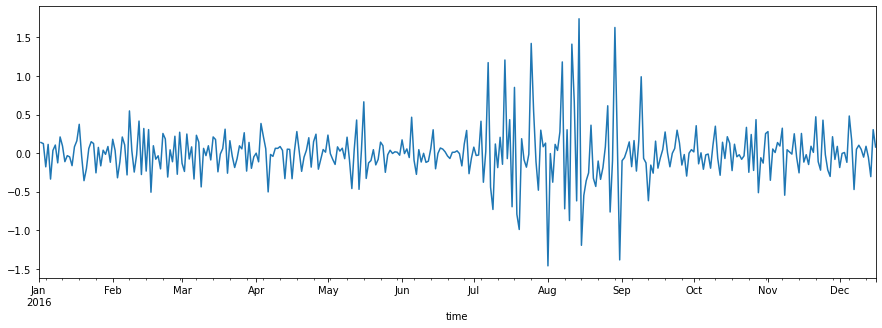

In [45]:
dataD['Used'].diff().plot()

    Hence additive seasonality

<h3> Decomposing time series using statsmodels

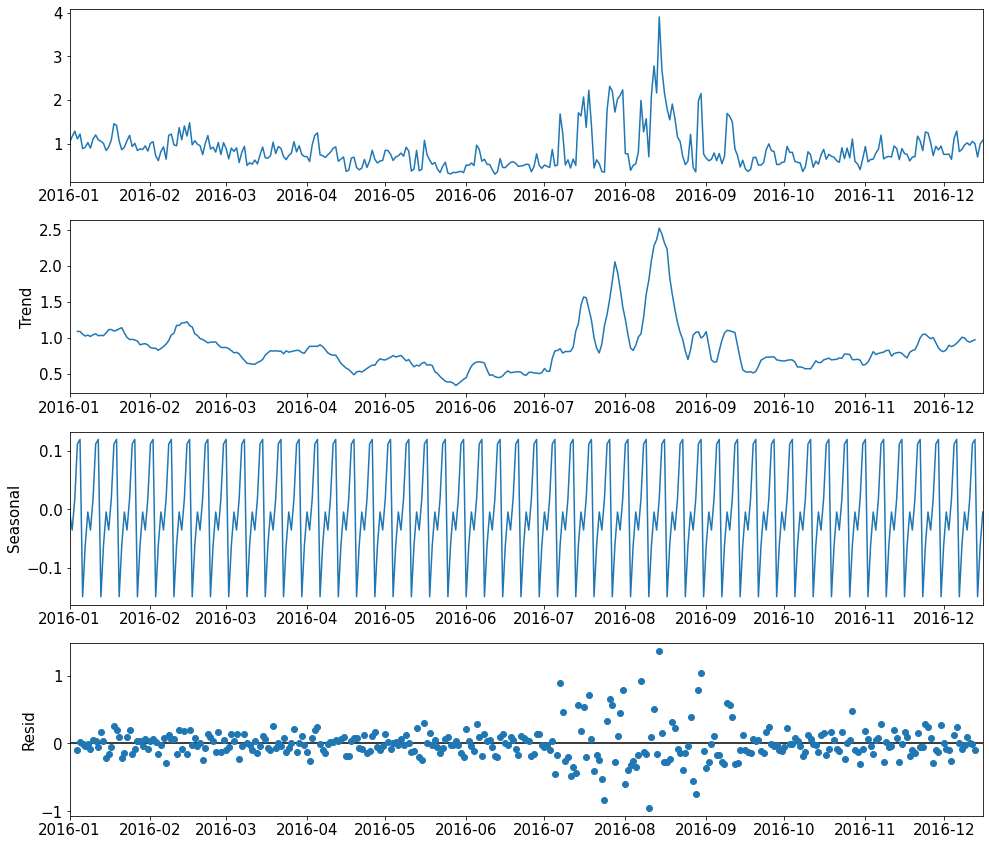

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc('figure',figsize=(14,12))
plt.rc('font',size=15)


result = seasonal_decompose(dataD[['Used']],model='additive')
fig = result.plot()


<b>The result of seasonal decomposition shows non-linear trend or exponential trend with additive seasonality. 

In [47]:
#Next we need to check if our time series is stationary or not. 

<h2> Stationary Test

1. Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
2. Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

<h3>Augmented Dickey-Fuller test

An augmented Dickey–Fuller test (ADF) is used to determine how strongly a time series is defined by a trend.

- The null hypothesis of the test is that the time series   is not stationary . 
- The alternate hypothesis  is that the time series is stationary.
<br>
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0),the data does not have a unit root and is stationary
    
- Also, to be stationary the critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

In [48]:
from statsmodels.tsa.stattools import adfuller
X= dataD.iloc[:,6].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.994541
p-value: 0.035407
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


    P-value < 0.05, the series is stationary

<h3>Frequency Distribution of Energy data 

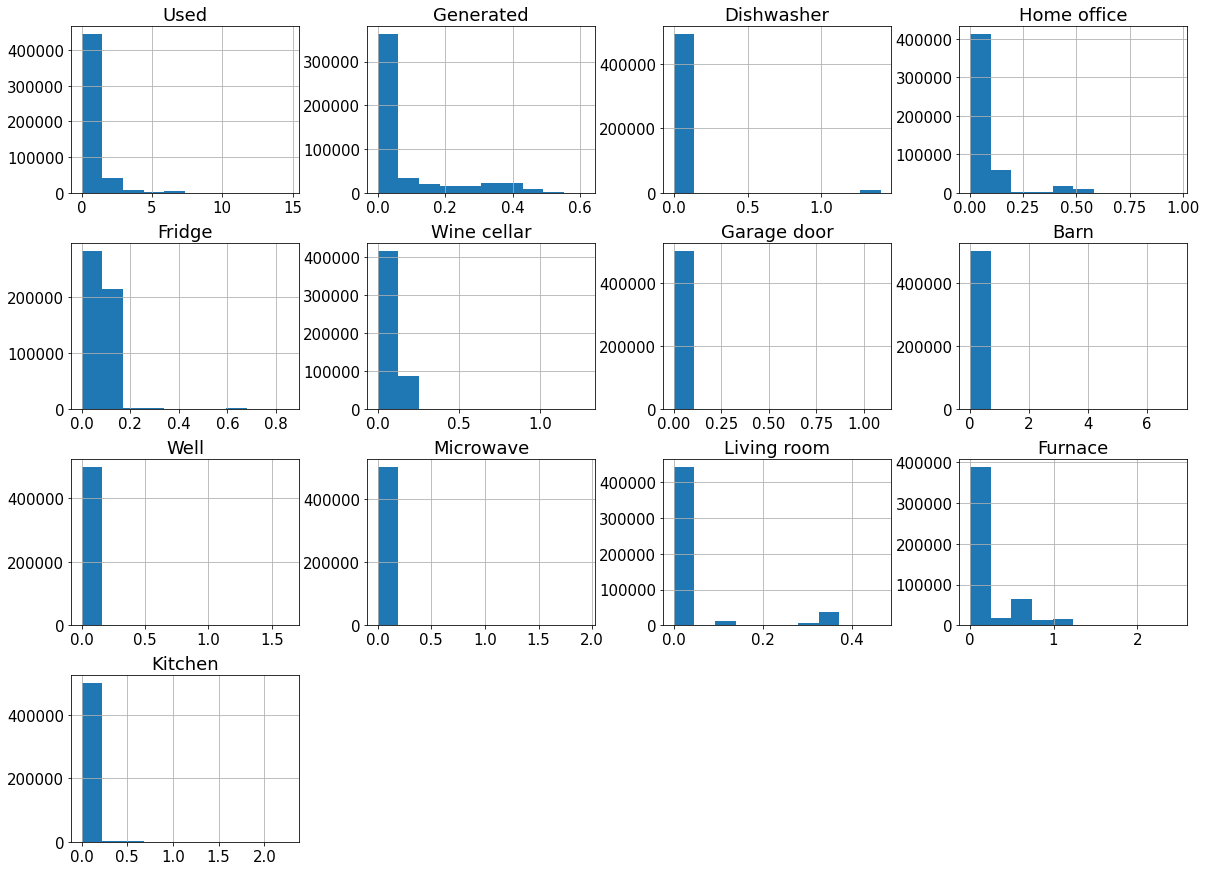

In [73]:
energy_data.hist(figsize=(20, 15))
plt.show()

In [ ]:
#we will investigate anomalies for 'Used','Generated','Home Office' and 'Living room'

<H1>Outlier/Anomaly detection 

An outlier or anomaly is an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism. There are two types of anomalies, Global Outliers and Contextual Outliers.<br>
    <b>Global outliers</b> are the data points far apart from the normal distribution of data. We can identify global outlies with naked eyes, which can occur due to business processing issues, data ingesting problems or even a natural data element where business processes are generated, so it is essential to understand the business context while working with anomalies.<br>
    <b> Contextual outliers </b> are very common in time-series data. These values exist within the global expectation but may appear anomalous within specific seasonal patterns, so they have a trend.<br>

<h3> Anomaly detection using Isolation Forest

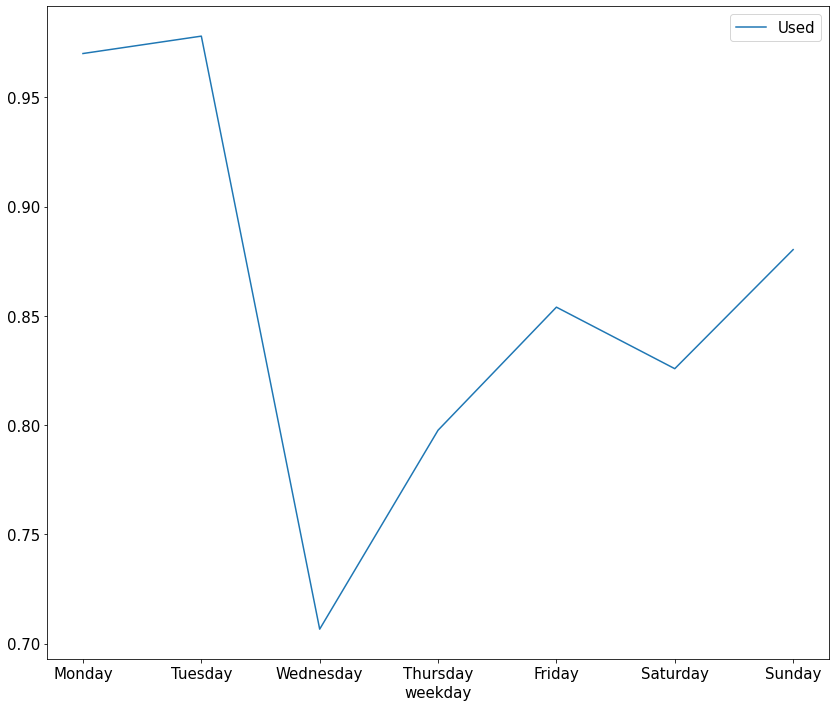

In [49]:
df[['Used','weekday']].groupby('weekday').mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot()
plt.show()

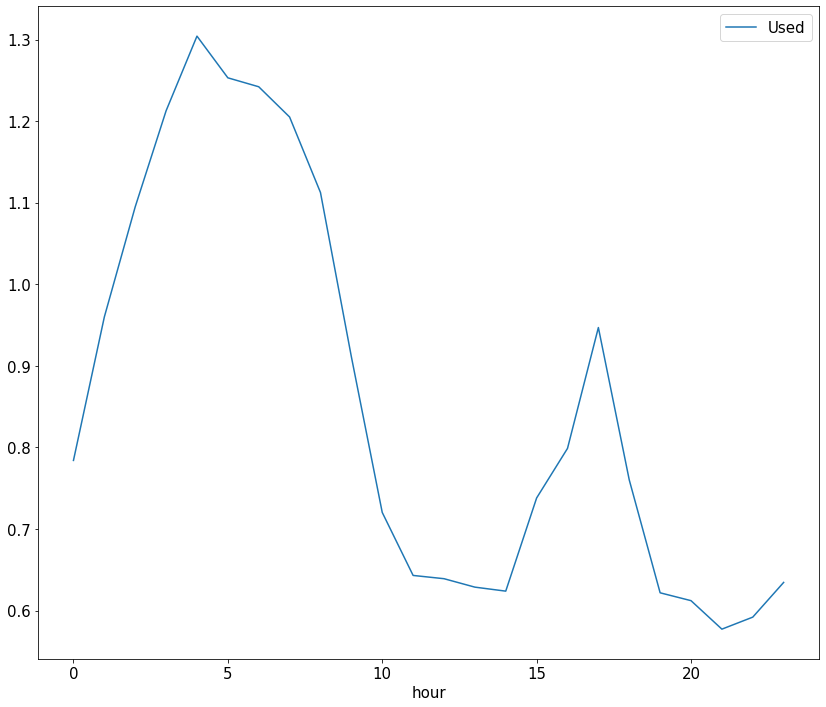

In [50]:
df[['Used','hour']].groupby('hour').mean().plot()
plt.show()

In [75]:
import plotly.express as px

fig = px.scatter(dataH.reset_index(),x='time',y='Used',title = 'Energy consumption')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

scaler = StandardScaler()
np_scaled = scaler.fit_transform(dataH['Used'].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)

# train isolation forest

model =  IsolationForest(contamination=0.01)  #contamination between 0 to 0.5
model.fit(data)

IsolationForest(contamination=0.01)

In [ ]:
df1 = dataH.copy()
df1['anomaly'] = model.predict(data)

In [57]:
df1[df1['anomaly']==-1]

,year,month,day,weekofyear,hour,minute,Used,Generated,Dishwasher,Home office,...,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,anomaly
time,,,,,,,,,,,,,,,,,,,,,
2016-07-07 05:00:00,2016.0,7.0,7.0,27.0,5.0,29.5,7.132073,0.006189,0.000381,0.038552,...,1017.603333,5.515000,0.090000,191.500000,0.000000,64.765000,0.000000,0.774126,0.000553,-1
2016-07-07 06:00:00,2016.0,7.0,7.0,27.0,6.0,29.5,8.359193,0.002930,0.000177,0.323086,...,1017.498500,5.245167,0.092167,186.816667,0.000000,65.481167,0.000000,0.775345,0.057206,-1
2016-07-14 04:00:00,2016.0,7.0,14.0,28.0,4.0,29.5,5.879833,0.027352,0.000167,0.094498,...,1020.945833,8.988333,0.120833,328.333333,0.000000,48.261667,0.000000,0.737092,0.000856,-1
2016-07-14 05:00:00,2016.0,7.0,14.0,28.0,5.0,29.5,5.093368,0.002907,0.000065,0.099992,...,1020.520167,8.534667,0.070500,303.633333,0.000000,49.424333,0.000000,0.605808,0.000678,-1
2016-07-15 07:00:00,2016.0,7.0,15.0,28.0,7.0,29.5,4.622514,0.003366,0.000107,0.537306,...,1016.535000,4.869333,0.058000,199.133333,0.000000,58.680667,0.000000,0.543088,0.027453,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 23:00:00,2016.0,9.0,9.0,36.0,23.0,29.5,6.299436,0.311167,0.451171,0.110337,...,1017.479167,2.551667,0.310000,193.666667,0.011417,68.510000,0.489167,0.766807,0.017118,-1
2016-09-10 00:00:00,2016.0,9.0,10.0,36.0,0.0,29.5,6.390704,0.322969,0.503261,0.049863,...,1017.579000,3.277667,0.314333,206.600000,0.059177,69.071000,0.724333,0.658746,0.000625,-1
2016-09-10 01:00:00,2016.0,9.0,10.0,36.0,1.0,29.5,6.747409,0.204126,0.001099,0.038936,...,1017.158667,4.095333,0.549333,212.533333,0.099833,68.579333,0.774000,0.772156,0.000486,-1


In [76]:
import plotly.express as px

fig = px.scatter(df1.reset_index(),x='time',y='Used',title = 'Energy consumption',color='anomaly',)

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

Energy consumption is between July 11 and Sep 11 is shown as high. Temperatire was also highest during this period. Therefore these can be considered as seasonal anomalies or contextual outliers. 